# Supervised Learning: Regression

Kaggle Dataset (https://www.kaggle.com/mirichoi0218/insurance)

Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
   * Our model will focus on both predicting the charges and being able to address the magnitude of the features, hence interpretabilty.

Brief description of the data set you chose and a summary of its attributes.
   * The data provided from Kaggle, referenced below, was tidy. Thus, no cleaning was needed. 

Brief summary of data exploration and actions taken for data cleaning and feature engineering.
   * As aforementioned the data did not need cleaning, however in terms of feature engineering: 
       * Sex & Smoker columns were convereted to be booleans
       * Children & Region columns were convereted to dummies
       * Age column was seperated into the following age ranges: 18-25, 26-35, 36-50, 51-64
       * The mean BMI was discovered for both male/female for each feature engineered age range as well as by region

Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


Questions: 
How much insurance will charge based on: 
BMI
children
age
region
smoking

Null/Alternative

1) ANOVA
* Ho: µ BMI_region == µ BMI_region
* Ha: µ BMI_region != µ BMI_region

2) ANOVA
* Ho: µ BMI_age == µ BMI_age
* Ha: µ BMI_age != µ BMI_age

3) ANOVA
* Ho: µ Charges_region == µ Charges_region
* Ha: µ Charges_region != µ Charges_region

4) ANOVA
* Ho: µ Charges_region == µ Charges_region
* Ha: µ Charges_region != µ Charges_region

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
import sklearn as sk 
import statsmodels.api as stats

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [7]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

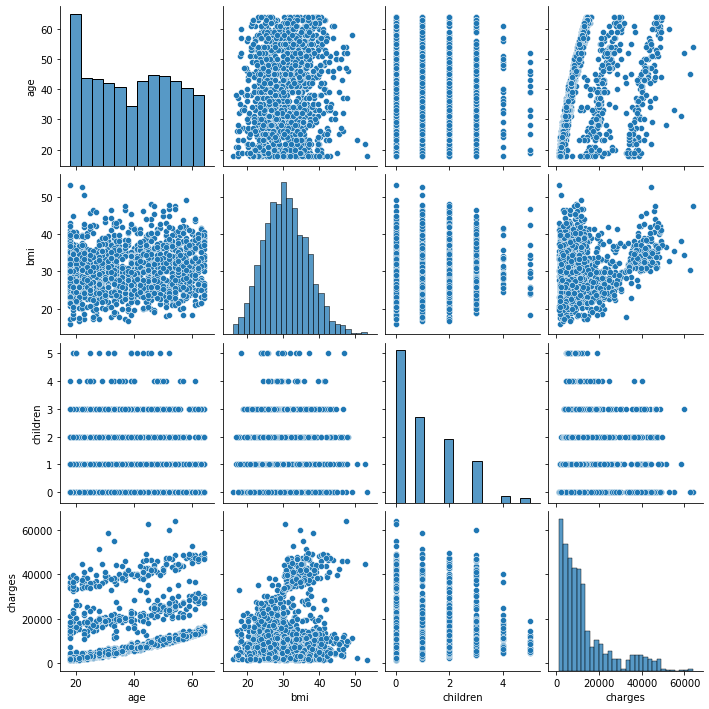

In [8]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


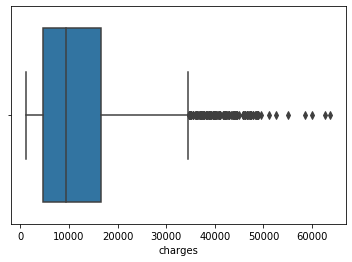

In [9]:
sns.boxplot(df['charges'])

In [10]:
no_outliers_charges = df[df['charges'] <= 15000]
no_outliers_charges.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896


In [11]:
no_outliers_charges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       980 non-null    int64  
 1   sex       980 non-null    object 
 2   bmi       980 non-null    float64
 3   children  980 non-null    int64  
 4   smoker    980 non-null    object 
 5   region    980 non-null    object 
 6   charges   980 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 61.2+ KB


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


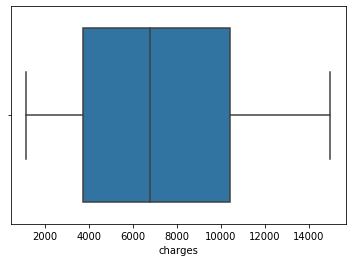

In [12]:
sns.boxplot(no_outliers_charges['charges'])

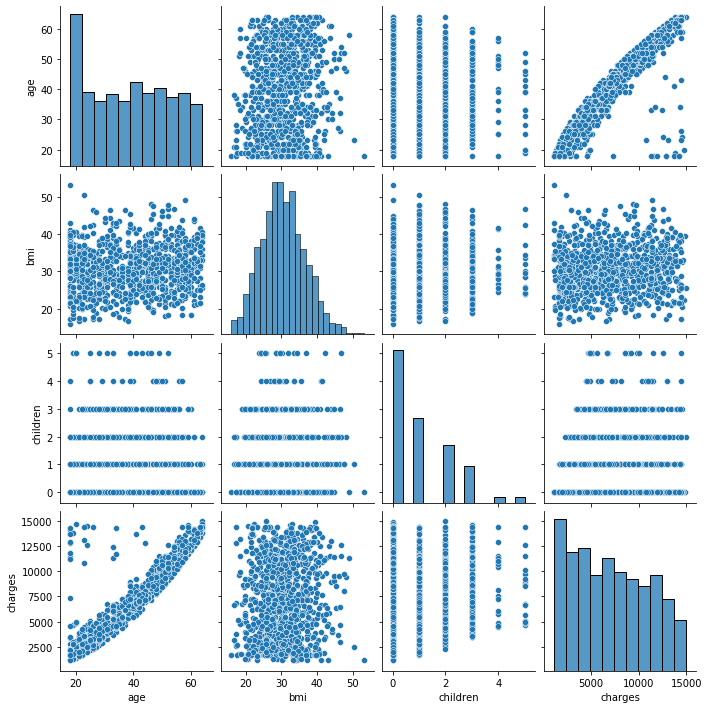

In [13]:
sns.pairplot(no_outliers_charges)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


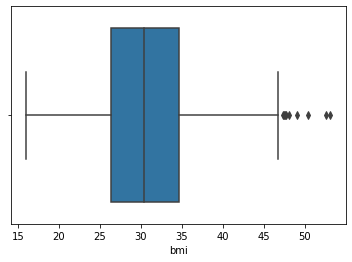

In [14]:
sns.boxplot(df['bmi'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


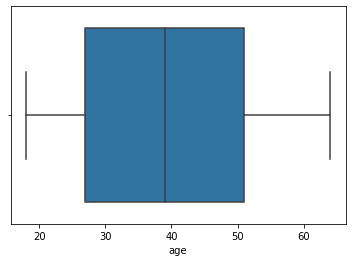

In [15]:
sns.boxplot(df['age'])

BMI is normally distributed

Charges/Children have several outliers
Address Charges outlier

In [16]:
num_df = df.drop(['sex','smoker', 'region', 'children'], axis=1)
num_df

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [17]:
cat_df = df.drop(['age','bmi','charges'], axis=1)
cat_df

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [18]:
bins = [10, 25, 35, 50, 64]

bins_num_df = pd.cut(num_df['age'], bins, include_lowest = True, labels = ('18-25', '26-35', '36-50', '51-64'))
cat_df['age_group'] = bins_num_df.cat.as_unordered()

In [19]:
cat_df['children'] = cat_df['children'].map(str)

In [20]:
cat_df_dummies = pd.get_dummies(cat_df, drop_first=True)
cat_df_dummies

,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_26-35,age_group_36-50,age_group_51-64
0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0,0,0,1,0,0,0,1,0
1334,0,0,0,0,0,0,0,0,0,0,0,0,0
1335,0,0,0,0,0,0,0,0,1,0,0,0,0
1336,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
features = pd.concat([num_df, cat_df_dummies], axis=1)
features.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_26-35,age_group_36-50,age_group_51-64
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1,0,0,0
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0,0,0,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0,1,0,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0,1,0,0


In [22]:
features = features.drop(['charges'], axis=1)
features.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_26-35,age_group_36-50,age_group_51-64
0,19,27.900,0,0,0,0,0,0,1,0,0,1,0,0,0
1,18,33.770,1,1,0,0,0,0,0,0,1,0,0,0,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0,1,0,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0,1,0,0


In [23]:
target = num_df['charges']
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [24]:
print(features.shape)
print(target.shape)

(1338, 15)
(1338,)


## Baseline OLS/Linear Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [26]:
model = stats.OLS(y_train, X_train)
lr = model.fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              510.9
Date:                Tue, 17 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:59:33   Log-Likelihood:                         -10870.
No. Observations:                1070   AIC:                                  2.177e+04
Df Residuals:                    1055   BIC:                                  2.184e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## Lasso

In [27]:
## training the model
from sklearn.linear_model import Lasso
from sklearn import metrics 
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation
lasso = Lasso(alpha = 0.01, normalize = False)
lasso = lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print("Testing Rooot Mean Squared Error:" , test_rmse)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred))

Training Root Mean Squared Error: 6037.09556915837
Testing Rooot Mean Squared Error: 5765.827954417198
R^2 Train Score: 0.7474841798951539
R^2 Test Score: 0.7858612326136756


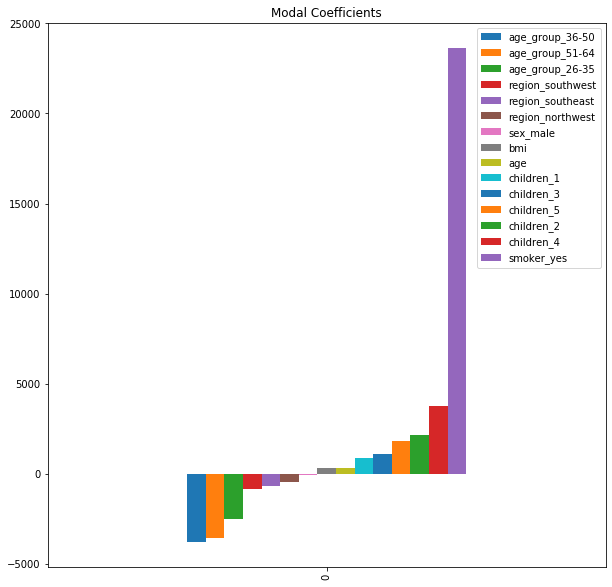

In [28]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

In [29]:
lasso_coef01

,age_group_36-50,age_group_51-64,age_group_26-35,region_southwest,region_southeast,region_northwest,sex_male,bmi,age,children_1,children_3,children_5,children_2,children_4,smoker_yes
0,-3758.833997,-3572.173699,-2500.158219,-803.183123,-650.005136,-461.980678,-60.154624,324.216235,344.633286,895.656269,1116.605111,1814.403629,2168.517772,3785.428354,23651.315653


In [30]:
clean_features = features[['age_group_36-50', 'age_group_51-64', 'age_group_26-35', 
                           'region_southwest', 'region_southeast', 'region_northwest', 'sex_male']]

In [116]:
# Importing libraries 
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 
      
# Prediction 
y_pred_lr = model.predict(X_test) 

In [117]:
X = features.to_numpy()
y = target

In [118]:
X = X_test.to_numpy()
print(X.shape)

(268, 15)


ValueError: x and y must be the same size

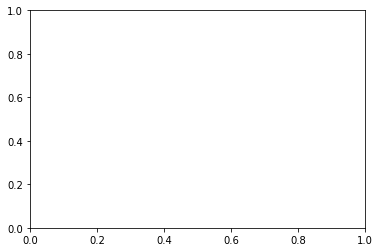

In [122]:
# Visualization  
      
plt.scatter(X, y_test, color='black') 

plt.plot(X, y_pred_lr, color='blue') 
  
plt.title('X vs y') 
  
plt.xlabel('X') 
  
plt.ylabel('y') 
  
plt.show() 